In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

## Download data

In [10]:
!rm housing.csv.*

!wget https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv

rm: housing.csv.*: No such file or directory
--2020-06-09 10:41:47--  https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv [following]
--2020-06-09 10:41:47--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

housing.csv         100%[===================>]   1.36M  2.73MB/s    in 0.5s    

2020-06-09 10:41:48 (2.73 MB/s) - 'housing.csv' saved [1423529/1423529]



## Data structure

In [13]:
housing = pd.read_csv('housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Histogram

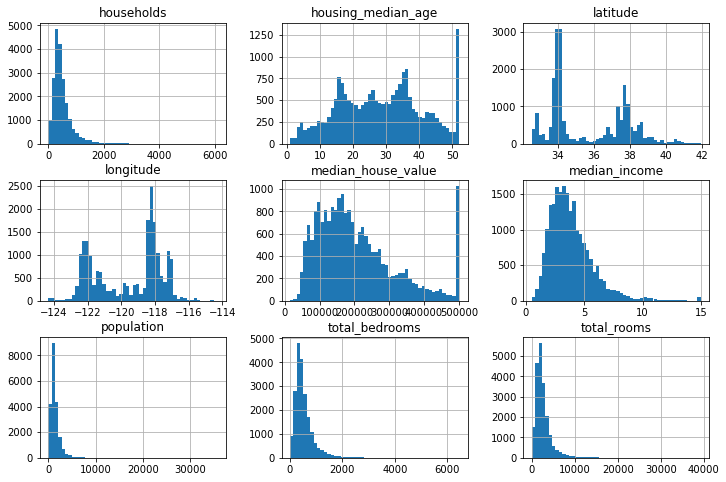

In [19]:
housing.hist(bins=50);

## Train-test split

_median_income_ histogram is left-skewed and it is important to that there is enough data points from the right side of the histogram in the test dataset. To to this we can split the dataset in groups based on _median_income_ and use stratified sampling.

In [25]:
housing['income_cat'] = pd.cut(housing.median_income,
                               bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing.income_cat):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [28]:
train_set.to_csv('housing_train_set.csv', index=False)
test_set.to_csv('housing_test_set.csv', index=False)